In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Đọc file và khai báo tên file

In [2]:
data = pd.read_csv('data_processed/contributors.csv')

top 10 login có nhiều lượt commit nhất

In [3]:
# Sort data by number of commits for visualization purposes
sorted_data = data.sort_values(by='commits', ascending=False)

# Add cumulative contribution for Pareto chart
sorted_data['cumulative_contribution'] = sorted_data['percent_contribution'].cumsum()
top_10 = sorted_data.head(10)
print(top_10)

         login  commits  percent_contribution  cumulative_contribution
0      charris     6555             19.281680                19.281680
1       seberg     2816              8.283327                27.565008
2       mattip     2705              7.956818                35.521826
3   teoliphant     2065              6.074244                41.596070
4     cournape     1525              4.485822                46.081892
5     rgommers     1362              4.006354                50.088246
6  eric-wieser     1239              3.644546                53.732792
7        pearu     1107              3.256265                56.989058
8           pv      817              2.403224                59.392281
9       mwiebe      759              2.232616                61.624897


Top 10 login với nhiều lượt commit nhất theo số lượt commit

C:\Users\admin\AppData\Local\Temp\ipykernel_8732\3618325631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10['commits'].values, y=top_10['login'].values, palette='viridis', ax=ax)


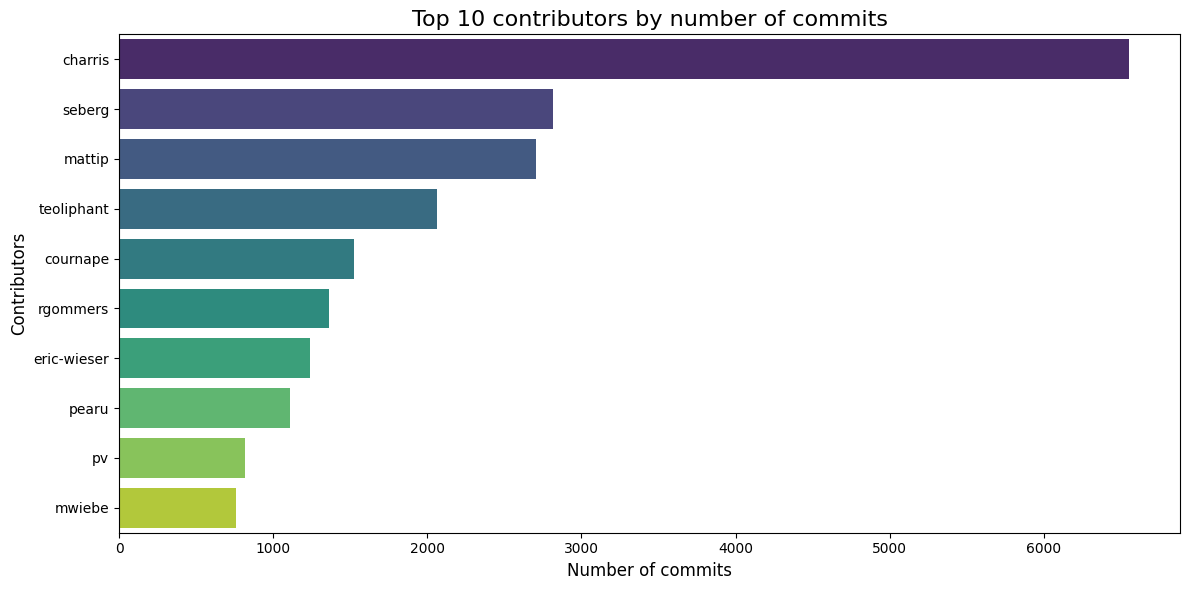

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=top_10['commits'].values, y=top_10['login'].values, palette='viridis', ax=ax)
ax.set_title("Top 10 contributors by number of commits", fontsize=16)
ax.set_xlabel("Number of commits", fontsize=12)
ax.set_ylabel("Contributors", fontsize=12)
plt.tight_layout()
plt.show()

so sánh top 10 với phần còn lại

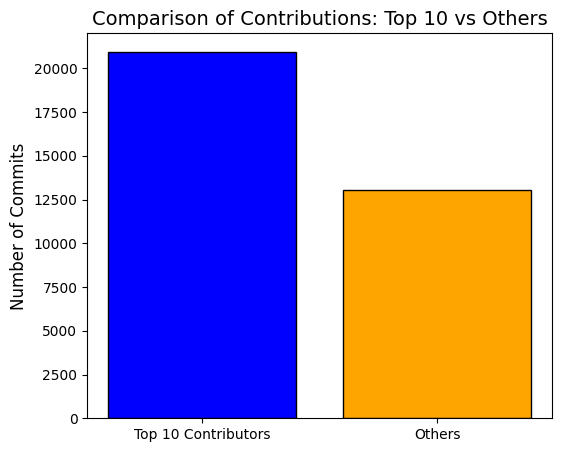

In [5]:
# Biểu đồ 3: Biểu đồ cột so sánh tổng đóng góp của Top 10 và phần còn lại
plt.figure(figsize=(6, 5))
total_commits = data['commits'].sum()
top_10_total_commits = top_10['commits'].sum()

# Dữ liệu cho biểu đồ
categories = ['Top 10 Contributors', 'Others']
values = [top_10_total_commits, total_commits - top_10_total_commits]

# Vẽ biểu đồ
plt.bar(categories, values, color=['blue', 'orange'], edgecolor='black')
plt.title('Comparison of Contributions: Top 10 vs Others', fontsize=14)
plt.ylabel('Number of Commits', fontsize=12)
plt.show()

Dùng biểu đồ Histogram hiển thị sự phân bổ các commit giữa những contributors, làm nổi bật độ lệch về phía ít commit hơn đối với hầu hết những người đóng góp.

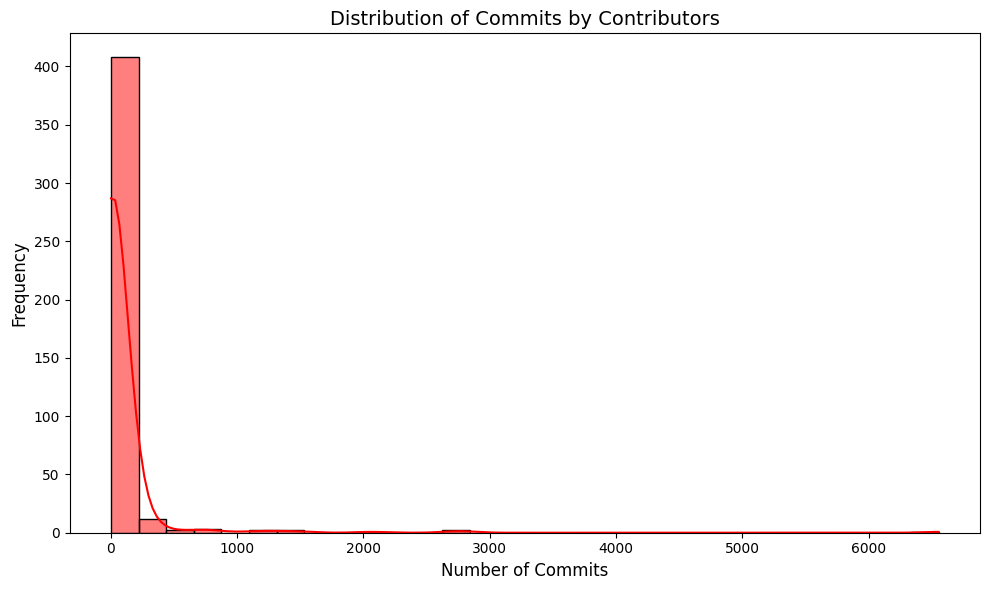

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['commits'], bins=30, kde=True, color='red')
plt.title('Distribution of Commits by Contributors', fontsize=14)
plt.xlabel('Number of Commits', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

Hiển thị 20 người đóng góp hàng đầu theo tỷ lệ phần trăm đóng góp với đường cong đóng góp tích lũy dùng biểu đồ Pareto

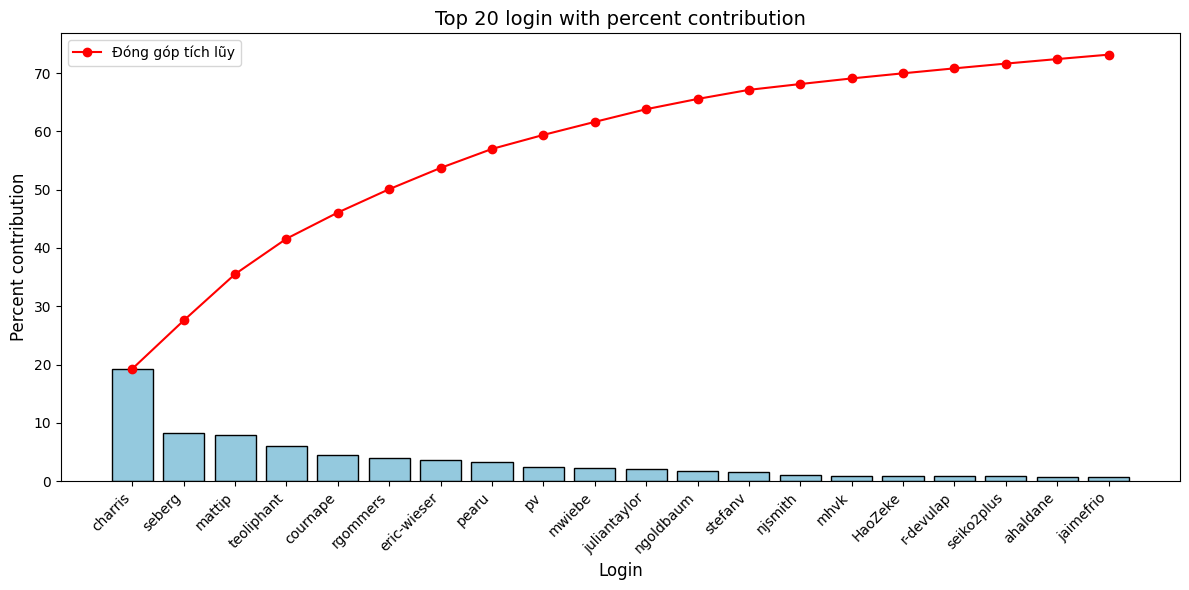

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='login',
    y='percent_contribution',
    data=sorted_data.head(20),
    color='skyblue',
    edgecolor='black'
)
plt.plot(
    sorted_data['login'].head(20),
    sorted_data['cumulative_contribution'].head(20),
    color='red',
    marker='o',
    label='Đóng góp tích lũy'
)
plt.title('Top 20 login with percent contribution', fontsize=14)
plt.xlabel('Login', fontsize=12)
plt.ylabel('Percent contribution', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Minh họa mối quan hệ giữa số lượng commit và tỷ lệ phần trăm tổng số đóng góp, xác định bất kỳ xu hướng hoặc giá trị ngoại lệ nào bằng biểu đồ biểu đồ phân tán

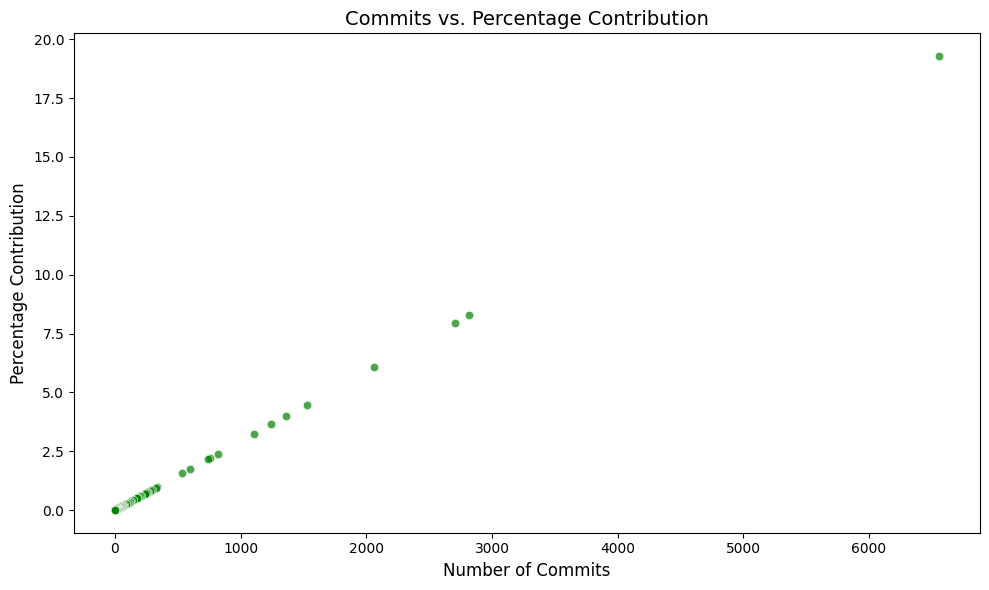

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='commits',
    y='percent_contribution',
    data=data,
    color='green',
    alpha=0.7,
    edgecolor='white'
)
plt.title('Commits vs. Percentage Contribution', fontsize=14)
plt.xlabel('Number of Commits', fontsize=12)
plt.ylabel('Percentage Contribution', fontsize=12)
plt.tight_layout()
plt.show()